## Import base simulation class

In [1]:
from simulation_base import EDSimulation
import os

## Set simulation parameters

In [2]:
LENGTH_OF_STAY = {
    'Major':9,
    'Minor':4,
    'Resus':6,
}

ARRIVALS_BEFORE_9 = {
    'Major':6,
    'Minor':4,
    'Resus':1,
}

ARRIVALS_AFTER_9 = {
    'Major':16,
    'Minor':12,
    'Resus':2,
}

NUM_BEDS = {
    'Major':110,
    'Minor':35,
    'Resus':16,
}

SIMULATION_DURATION = 30 * 24  # Total simulation time in hours
MIN_PATIENCE_MINOR = 4
MAX_PATIENCE_MINOR = 8

## Run a simulation

In [3]:
simulation = EDSimulation(
    LENGTH_OF_STAY,
    ARRIVALS_BEFORE_9,
    ARRIVALS_AFTER_9,
    SIMULATION_DURATION,
    MIN_PATIENCE_MINOR,
    MAX_PATIENCE_MINOR
)
patient_data = simulation.run_simulation(NUM_BEDS)

Running Simulation: 100%|██████████| 719/719 [00:00<00:00, 1046.94it/s]


## Inspect characteristics (stats) of the waiting times for each Acuity level

The table below includes the row count (for each arrival time), the mean (average) of wait times, their standard deviation, minimum and maximum values, as well as the three first quartiles. 

In [4]:
patient_data.groupby(by=["Arrival_Time","Acuity"])["Wait_Time"].mean().unstack().fillna(0).describe()

Acuity       Major       Minor       Resus
count   718.000000  718.000000  718.000000
mean      1.411011    2.006060    0.015499
std       1.442707    1.582889    0.109484
min       0.000000    0.000000    0.000000
25%       0.000000    0.500000    0.000000
50%       1.000000    2.000000    0.000000
75%       2.400000    3.250000    0.000000
max       6.388889    5.857143    1.333333

## Plot simulation results

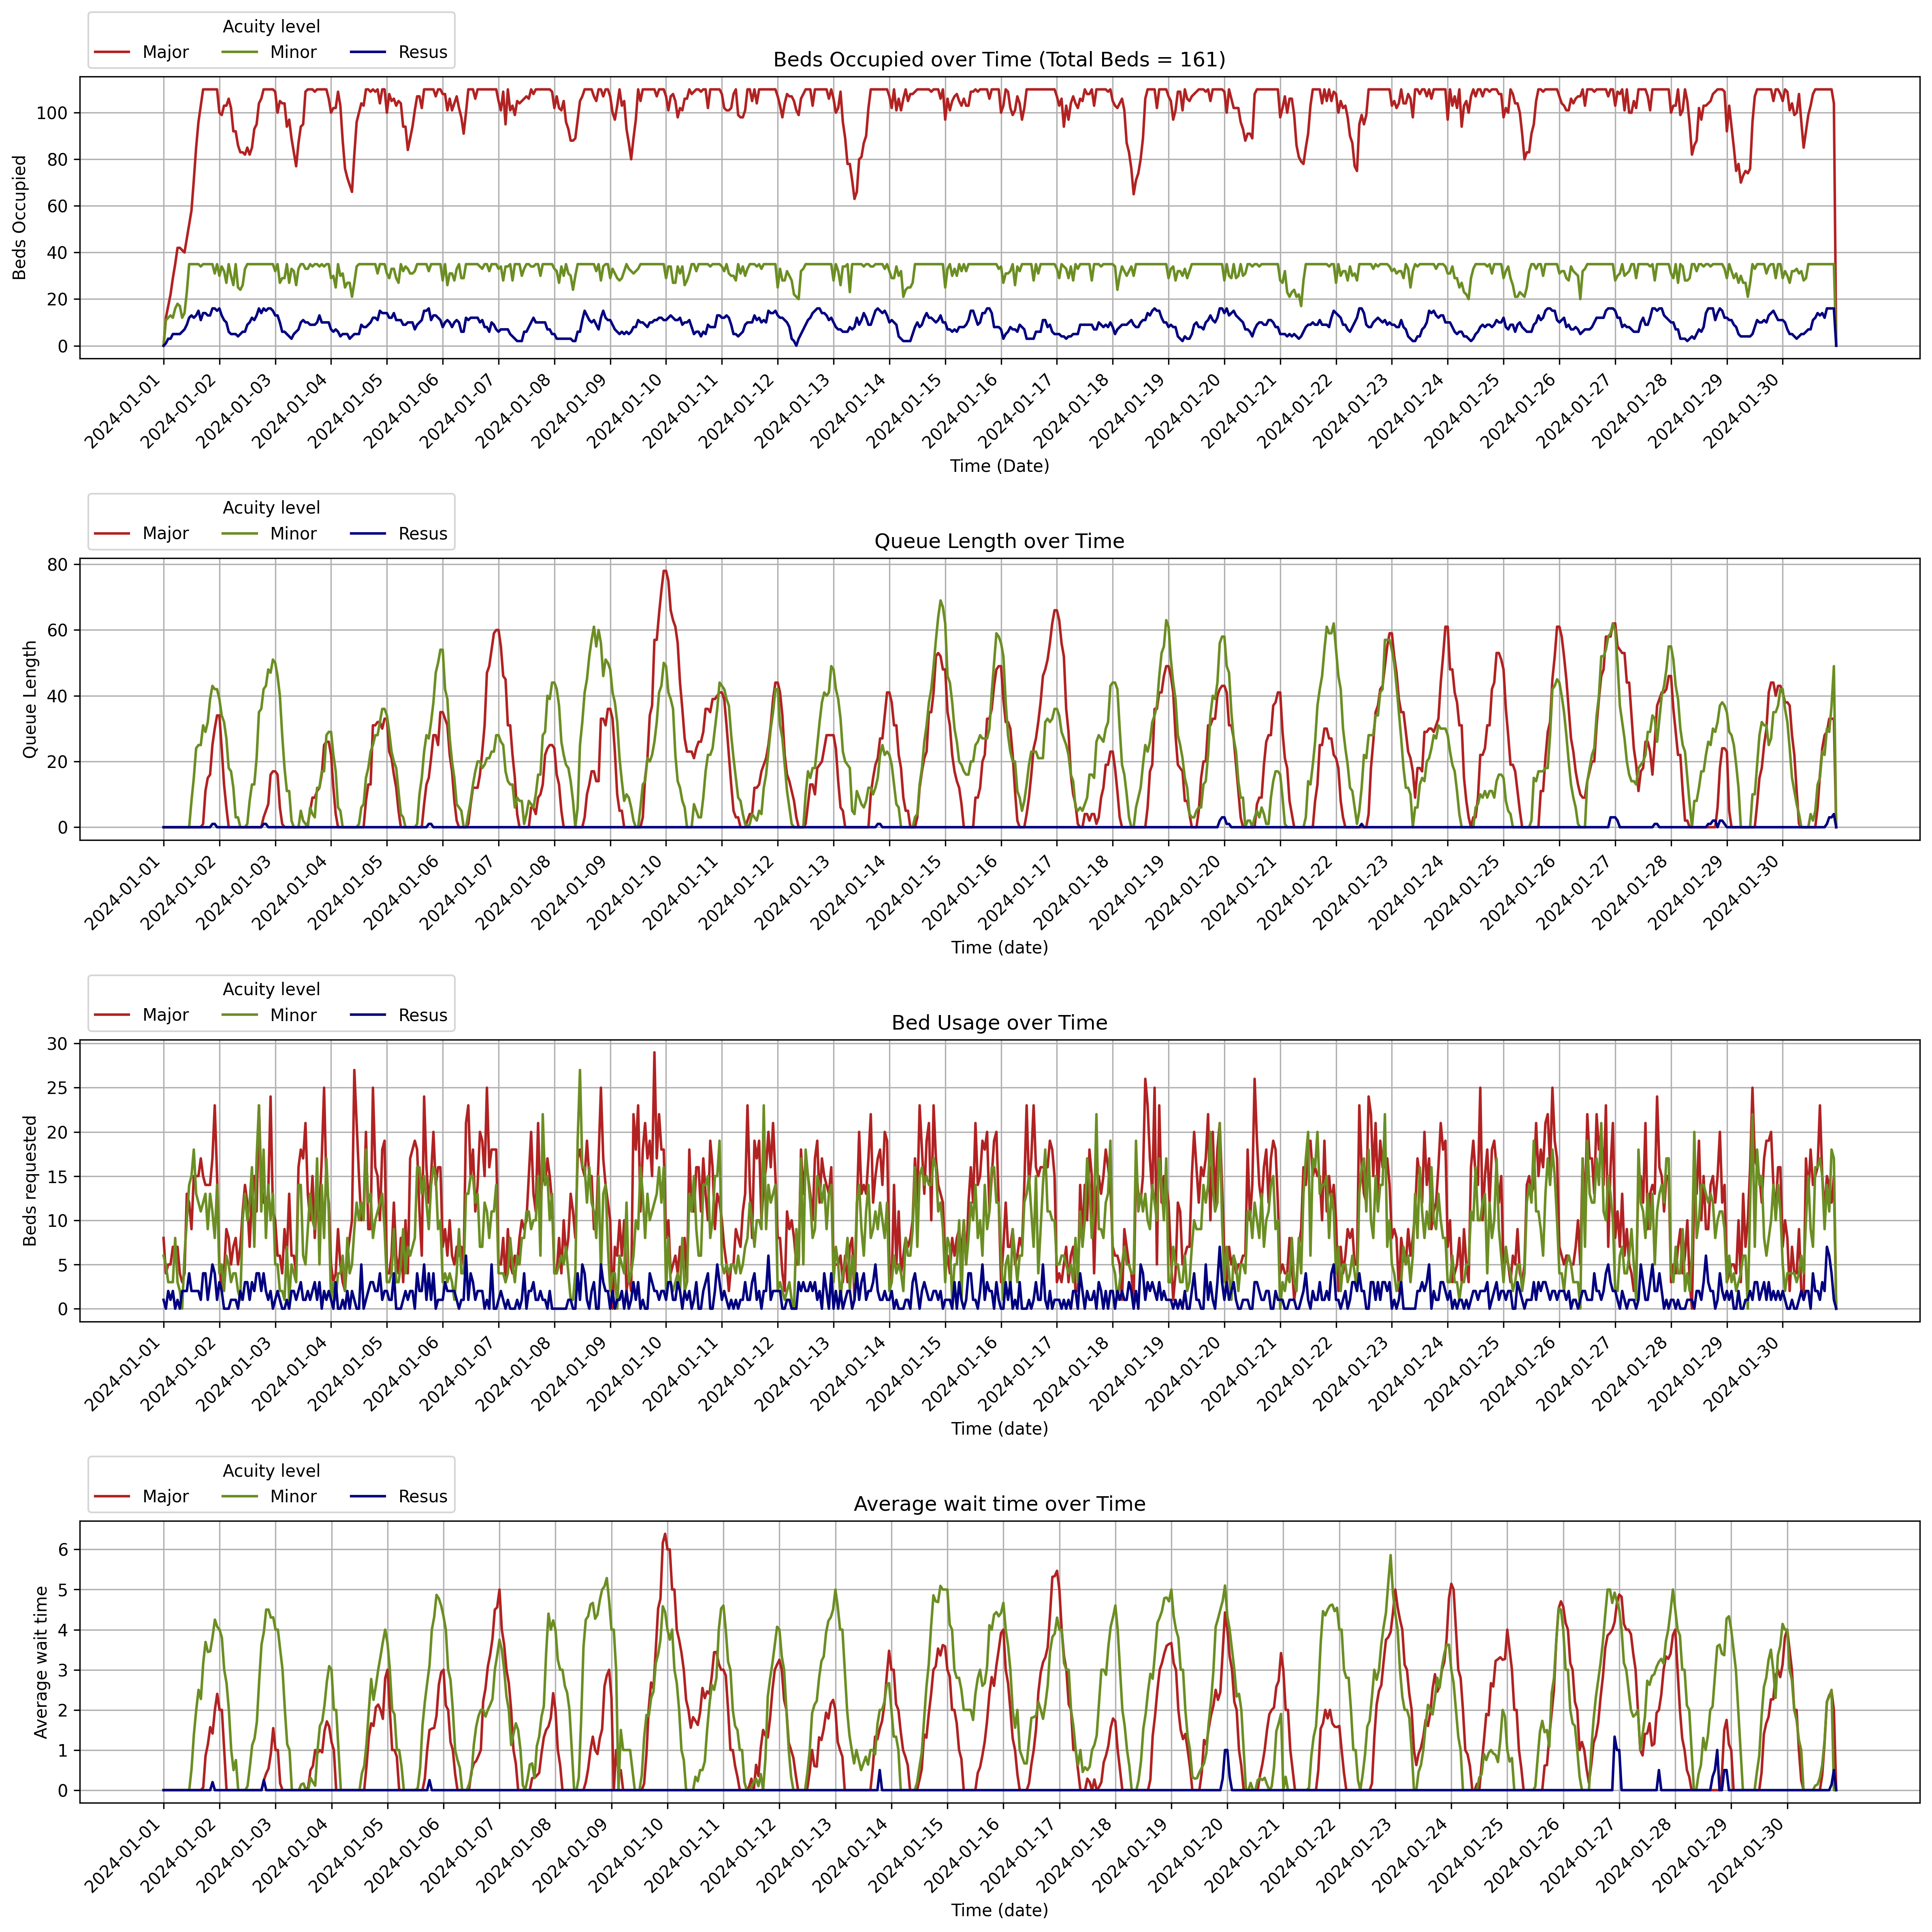

In [5]:
simulation.plot_results(row_size=4, aspect_ratio=1)

## Save results

In [6]:
base_dir = os.path.abspath('../')
output_dir = os.path.join(base_dir, 'data')
output_filename = "simulation_results.csv"
output_filepath = os.path.join(output_dir, output_filename)
simulation.save_patient_data(output_filepath)

Patient data saved to:
/Users/vbs/Dropbox/Coding/nhs_ed_simulation/data/simulation_results.csv


## What changes if the overall length of stay reduces by 20%?

In [7]:
LENGTH_OF_STAY2 = {
    'Major':9*0.8,
    'Minor':4*0.8,
    'Resus':6*0.8,
}

simulation2 = EDSimulation(
    LENGTH_OF_STAY2,
    ARRIVALS_BEFORE_9,
    ARRIVALS_AFTER_9,
    SIMULATION_DURATION,
    MIN_PATIENCE_MINOR,
    MAX_PATIENCE_MINOR
)
patient_data2 = simulation2.run_simulation(NUM_BEDS)

Running Simulation: 100%|██████████| 719/719 [00:00<00:00, 1078.46it/s]


## Inspect characteristics (stats) of the waiting times for each Acuity level

The table below includes the row count (for each arrival time), the mean (average) of wait times, their standard deviation, minimum and maximum values, as well as the three first quartiles. 

In [8]:
patient_data2.groupby(by=["Arrival_Time","Acuity"])["Wait_Time"].mean().unstack().fillna(0).describe()

Acuity       Major       Minor       Resus
count   719.000000  719.000000  719.000000
mean      0.089548    0.479978    0.000199
std       0.251949    0.745586    0.005328
min       0.000000    0.000000    0.000000
25%       0.000000    0.000000    0.000000
50%       0.000000    0.000000    0.000000
75%       0.000000    0.833333    0.000000
max       1.714286    3.285714    0.142857

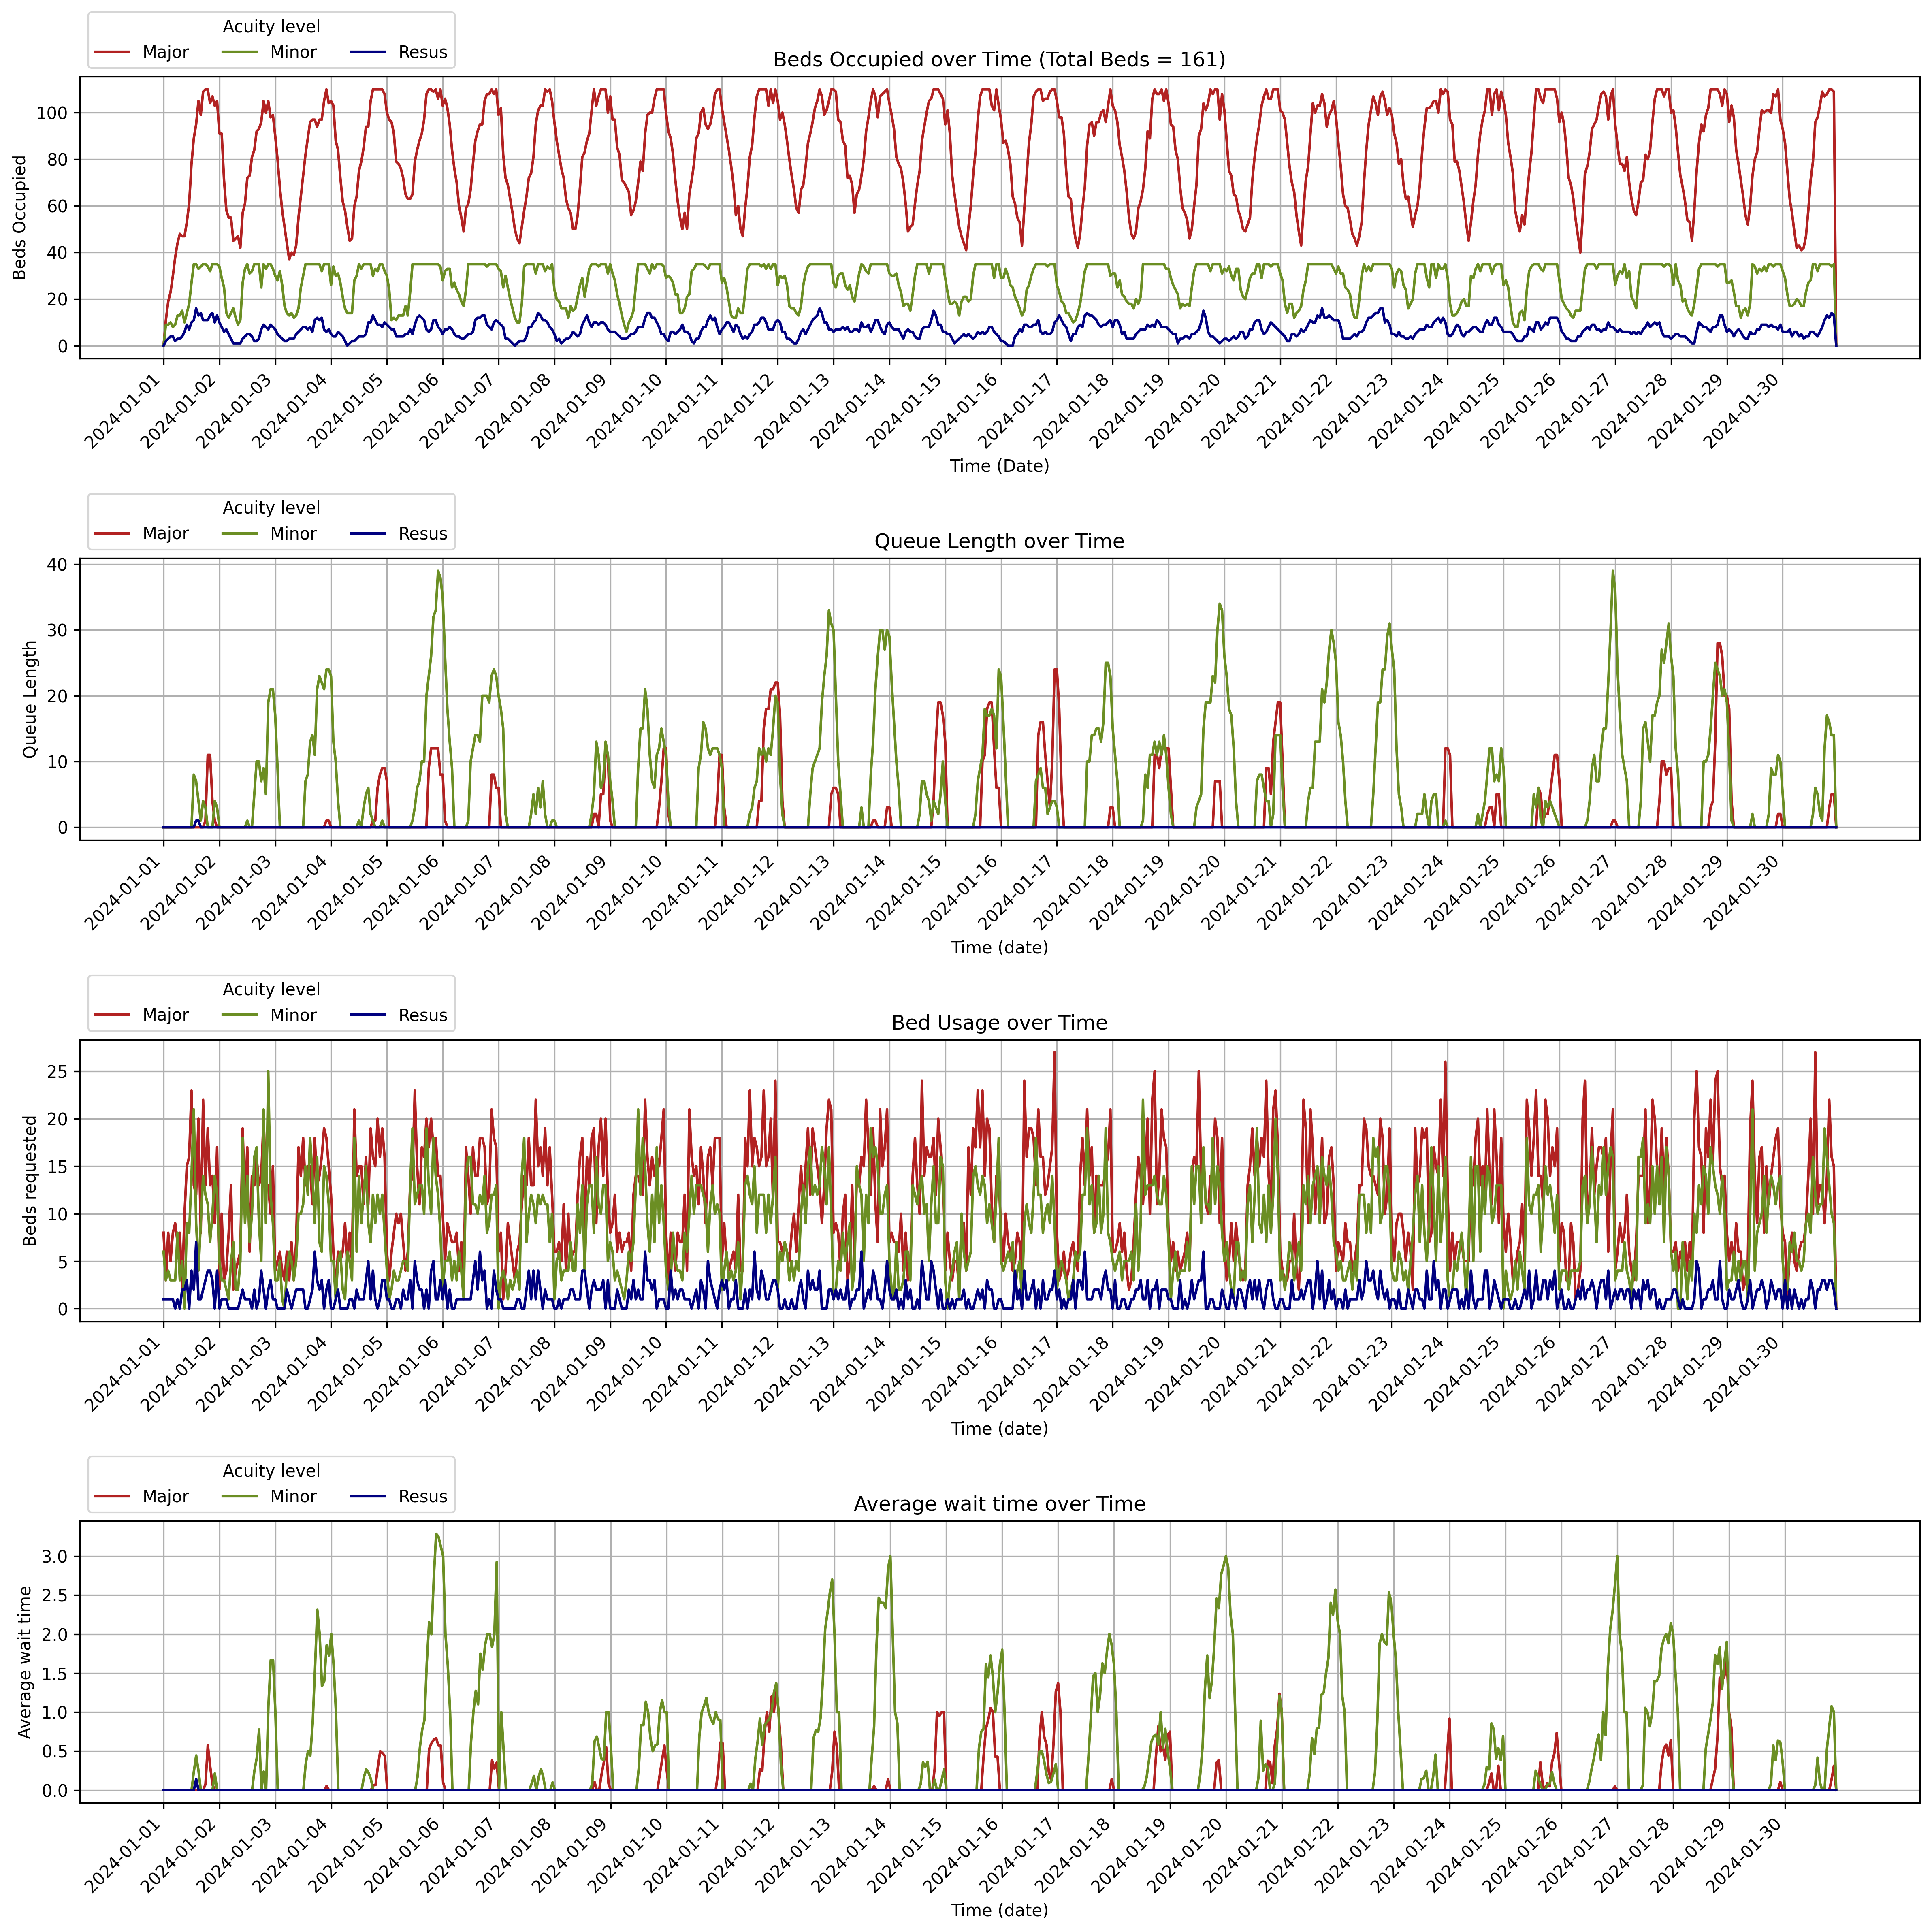

Patient data saved to:
/Users/vbs/Dropbox/Coding/nhs_ed_simulation/data/simulation_results2.csv


In [9]:
simulation2.plot_results(row_size=4, aspect_ratio=1)
output_filename = "simulation_results2.csv"
output_filepath = os.path.join(output_dir, output_filename)
simulation2.save_patient_data(output_filepath)